In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [311]:
#read in the csv files and save them as variables

credits_data = "Resources/credits.csv"
titles_data = "Resources/titles.csv"

#create data frames using the newly created variables

credits_data_df = pd.read_csv(credits_data)
titles_data_df = pd.read_csv(titles_data)

In [312]:
#show part of the credits data dataframe

credits_data_df.head(100)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...
95,11480,tm70993,Charles McKeown,False Prophet / Blind Man / Giggling Guard / Stig,ACTOR
96,11481,tm70993,John Young,"Matthias, Son of Deuteronomy of Gath",ACTOR
97,11483,tm70993,Gwen Taylor,Mrs. Big Nose,ACTOR
98,11484,tm70993,Sue Jones-Davies,Judith Iscariot,ACTOR


In [313]:
#show part of the titles data dataframe

titles_data_df.head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5
7,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,"['drama', 'music', 'romance', 'family']",['US'],NaN,tt0058385,7.8,94121.0,15.949,7.6
8,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'drama']",['US'],NaN,tt0080453,5.8,69053.0,44.038,6.2
9,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['drama', 'crime', 'action']",['US'],NaN,tt0061418,7.7,111189.0,15.309,7.5


In [314]:
#remove special characters in the genres column

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

for char in spec_chars:
    titles_data_df['genres'] = titles_data_df['genres'].str.replace(char, ' ')

# Titles Data Cleaning

In [315]:
# Remove unecessary columns from the DataFrame and save titles_data_df to a new DataFrame

reduced_titles_data_df = titles_data_df[["id", "title", "type", "release_year", "age_certification", 
                                         "runtime", "genres", "imdb_id", "imdb_score",
                                        "imdb_votes", "tmdb_popularity", "tmdb_score"]]

#show the titles_data_df dataframe

reduced_titles_data_df.head(20)

,id,title,type,release_year,age_certification,runtime,genres,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,crime drama,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,comedy fantasy,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,R,94,comedy,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,R,133,horror,tt0070047,8.1,391942.0,95.337,7.7
5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,comedy european,tt0063929,8.8,72895.0,12.919,8.3
6,tm14873,Dirty Harry,MOVIE,1971,R,102,thriller crime action,tt0066999,7.7,153463.0,14.745,7.5
7,tm185072,My Fair Lady,MOVIE,1964,G,170,drama music romance family,tt0058385,7.8,94121.0,15.949,7.6
8,tm98978,The Blue Lagoon,MOVIE,1980,R,104,romance drama,tt0080453,5.8,69053.0,44.038,6.2
9,tm119281,Bonnie and Clyde,MOVIE,1967,R,110,drama crime action,tt0061418,7.7,111189.0,15.309,7.5


In [316]:
#check to see if there are any rows with missing data
reduced_titles_data_df.count()

id                   5806
title                5805
type                 5806
release_year         5806
age_certification    3196
runtime              5806
genres               5806
imdb_id              5362
imdb_score           5283
imdb_votes           5267
tmdb_popularity      5712
tmdb_score           5488
dtype: int64

In [317]:
#remove the rows with missing data and check again with .count()

new_titles_data_df = reduced_titles_data_df.dropna(how="any")
new_titles_data_df.count()

id                   2900
title                2900
type                 2900
release_year         2900
age_certification    2900
runtime              2900
genres               2900
imdb_id              2900
imdb_score           2900
imdb_votes           2900
tmdb_popularity      2900
tmdb_score           2900
dtype: int64

In [318]:
#show new_titles_data_df

new_titles_data_df.head(10)

,id,title,type,release_year,age_certification,runtime,genres,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,1976,R,113,crime drama,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,comedy fantasy,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,R,94,comedy,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,R,133,horror,tt0070047,8.1,391942.0,95.337,7.7
5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,comedy european,tt0063929,8.8,72895.0,12.919,8.3
6,tm14873,Dirty Harry,MOVIE,1971,R,102,thriller crime action,tt0066999,7.7,153463.0,14.745,7.5
7,tm185072,My Fair Lady,MOVIE,1964,G,170,drama music romance family,tt0058385,7.8,94121.0,15.949,7.6
8,tm98978,The Blue Lagoon,MOVIE,1980,R,104,romance drama,tt0080453,5.8,69053.0,44.038,6.2
9,tm119281,Bonnie and Clyde,MOVIE,1967,R,110,drama crime action,tt0061418,7.7,111189.0,15.309,7.5
10,tm67378,The Professionals,MOVIE,1966,PG-13,117,western action european,tt0060862,7.3,16168.0,12.155,7.1


In [319]:
#Filter the dataframe so that it only has Movie data
only_movies_df = new_titles_data_df.loc[new_titles_data_df["type"] == "MOVIE", :]
only_movies_df

,id,title,type,release_year,age_certification,runtime,genres,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,1976,R,113,crime drama,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,comedy fantasy,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,R,94,comedy,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,R,133,horror,tt0070047,8.1,391942.0,95.337,7.7
6,tm14873,Dirty Harry,MOVIE,1971,R,102,thriller crime action,tt0066999,7.7,153463.0,14.745,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...
5692,tm983722,Prime Time,MOVIE,2021,R,93,thriller drama,tt11460976,5.2,1757.0,13.364,5.1
5699,tm855340,Thalaivii,MOVIE,2021,G,153,drama,tt10152736,5.9,30439.0,5.557,5.8
5704,tm1099320,Convergence: Courage in a Crisis,MOVIE,2021,R,113,documentation,tt15398694,5.4,252.0,9.258,5.2
5713,tm1120766,Angèle,MOVIE,2021,R,84,music documentation,tt15820298,7.0,493.0,5.362,7.1


In [320]:
graph_titles_df = only_movies_df[["title", "genres", "imdb_score"]]
graph_titles_df

,title,genres,imdb_score
1,Taxi Driver,crime drama,8.3
2,Monty Python and the Holy Grail,comedy fantasy,8.2
3,Life of Brian,comedy,8.0
4,The Exorcist,horror,8.1
6,Dirty Harry,thriller crime action,7.7
...,...,...,...
5692,Prime Time,thriller drama,5.2
5699,Thalaivii,drama,5.9
5704,Convergence: Courage in a Crisis,documentation,5.4
5713,Angèle,music documentation,7.0


In [321]:
#We need to first separate the values in the genres into multiple columns

graph_titles_df1 = graph_titles_df['genres'].str.split(',', expand=True)
graph_titles_df1

,0
1,crime drama
2,comedy fantasy
3,comedy
4,horror
6,thriller crime action
...,...
5692,thriller drama
5699,drama
5704,documentation
5713,music documentation


In [322]:
#show all the genre types within the genres column
new_graph_titles_df1 = graph_titles_df1.dropna(how='any')
new_graph_titles_df1

,0
1,crime drama
2,comedy fantasy
3,comedy
4,horror
6,thriller crime action
...,...
5692,thriller drama
5699,drama
5704,documentation
5713,music documentation


In [323]:
genre_list = ['action', 'family', 'animation', 
              'history', 'scifi', 'romance', 'comedy', 'fantasy', 
              'horror', 'drama', 'scifi', 'thriller', 'music', 'sport', 'documentation']


In [324]:
better_titles_data_df = titles_data_df[["id", "title", "release_year", 
                                          "genres", "imdb_score",
                                        "imdb_votes","tmdb_score"]]

best_titles_data_df = better_titles_data_df.dropna(how="any")

best_titles_data_df

,id,title,release_year,genres,imdb_score,imdb_votes,tmdb_score
1,tm84618,Taxi Driver,1976,crime drama,8.3,795222.0,8.2
2,tm127384,Monty Python and the Holy Grail,1975,comedy fantasy,8.2,530877.0,7.8
3,tm70993,Life of Brian,1979,comedy,8.0,392419.0,7.8
4,tm190788,The Exorcist,1973,horror,8.1,391942.0,7.7
5,ts22164,Monty Python's Flying Circus,1969,comedy european,8.8,72895.0,8.3
...,...,...,...,...,...,...,...
5792,tm1097142,My Bride,2021,comedy drama romance,4.9,281.0,5.3
5795,tm878575,The Heartbreak Club,2021,comedy drama romance,6.2,188.0,8.0
5796,ts286386,The Big Day,2021,reality romance,4.6,327.0,6.0
5798,tm1004011,Time to Dance,2021,drama romance,2.2,950.0,4.0


In [328]:
#We need to first separate the values in the genres into multiple columns

graph_titles_df1 = graph_titles_df['genres'].str.split(expand=True)
graph_titles_df1

,0,1,2,3,4,5,6,7
1,crime,drama,None,None,None,None,None,None
2,comedy,fantasy,None,None,None,None,None,None
3,comedy,None,None,None,None,None,None,None
4,horror,None,None,None,None,None,None,None
6,thriller,crime,action,None,None,None,None,None
...,...,...,...,...,...,...,...,...
5692,thriller,drama,None,None,None,None,None,None
5699,drama,None,None,None,None,None,None,None
5704,documentation,None,None,None,None,None,None,None
5713,music,documentation,None,None,None,None,None,None


In [342]:
cleaner_genre_df = pd.DataFrame(graph_titles_df1[0])
cleanest_genre_df = cleaner_genre_df.rename(columns={0:"Genre"})
cleanest_genre_df

,Genre
1,crime
2,comedy
3,comedy
4,horror
6,thriller
...,...
5692,thriller
5699,drama
5704,documentation
5713,music


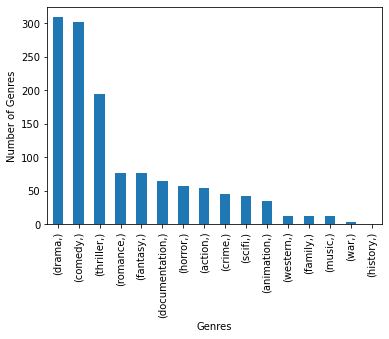

In [355]:
#count how many of each genre
count_genre = cleanest_genre_df.value_counts()

#insert genre count into bar chart
genre_chart = count_genre.plot(kind='bar')

#set the x and y labels
genre_chart.set_xlabel("Genres")
genre_chart.set_ylabel("Number of Genres")

plt.show()

In [339]:
cleanest_genre_df.value_counts()

Genre        
drama            309
comedy           302
thriller         195
romance           77
fantasy           76
documentation     65
horror            58
action            55
crime             46
scifi             42
animation         35
western           13
family            13
music             12
war                3
history            1
dtype: int64